In [1]:
from Files import Files
from Algorithms import Algorithms
from Machine_learning import Machine_learning_model, plot_results
import random
from Chatbot import Chatbot
from Short_Chatbot import Shorten_Chatbot

pygame 2.6.1 (SDL 2.28.4, Python 3.10.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Setting up the system and doing tests

In [2]:
File1 = Files('dialog_acts.csv')
File1.separete_labels_utt([])
data_as_frame, data_as_array = File1.make_a_dataframe()
File1.keywords_lists()
my_dict, inv_dict, labels_keys = File1.create_dicitionaries()

### Do not run the cells below if you are not interested in the statistics of the dataest. Go to the part 'Actual Talking'. 

In [3]:
name1 = 'zero_rule_algorithm_classification'
name2 = 'keyword_rule_algorithm_classification'
algo1 = Algorithms(name1,File1)
n_zero = algo1.get_algorithm(File1.make_a_dataframe()[1],labels_keys)
algo2 = Algorithms(name2,File1)
n_keyword = algo2.get_algorithm(File1.make_a_dataframe()[1],labels_keys)

Now you can test the zero rule algorithm by entering utterances (press 'exit' to exit)
The total number of correct classifications by the zero rule are: 10159
The percentage accuracy of zero rule is 39.84
Now you can test the keyword rule algorithm by entering utterances (press 'exit' to exit)
The total number of correct classifications by the keyword rule are: 23464
The percentage accuracy of keyword rule is 92.02
The label in which most errors are observed is:  request


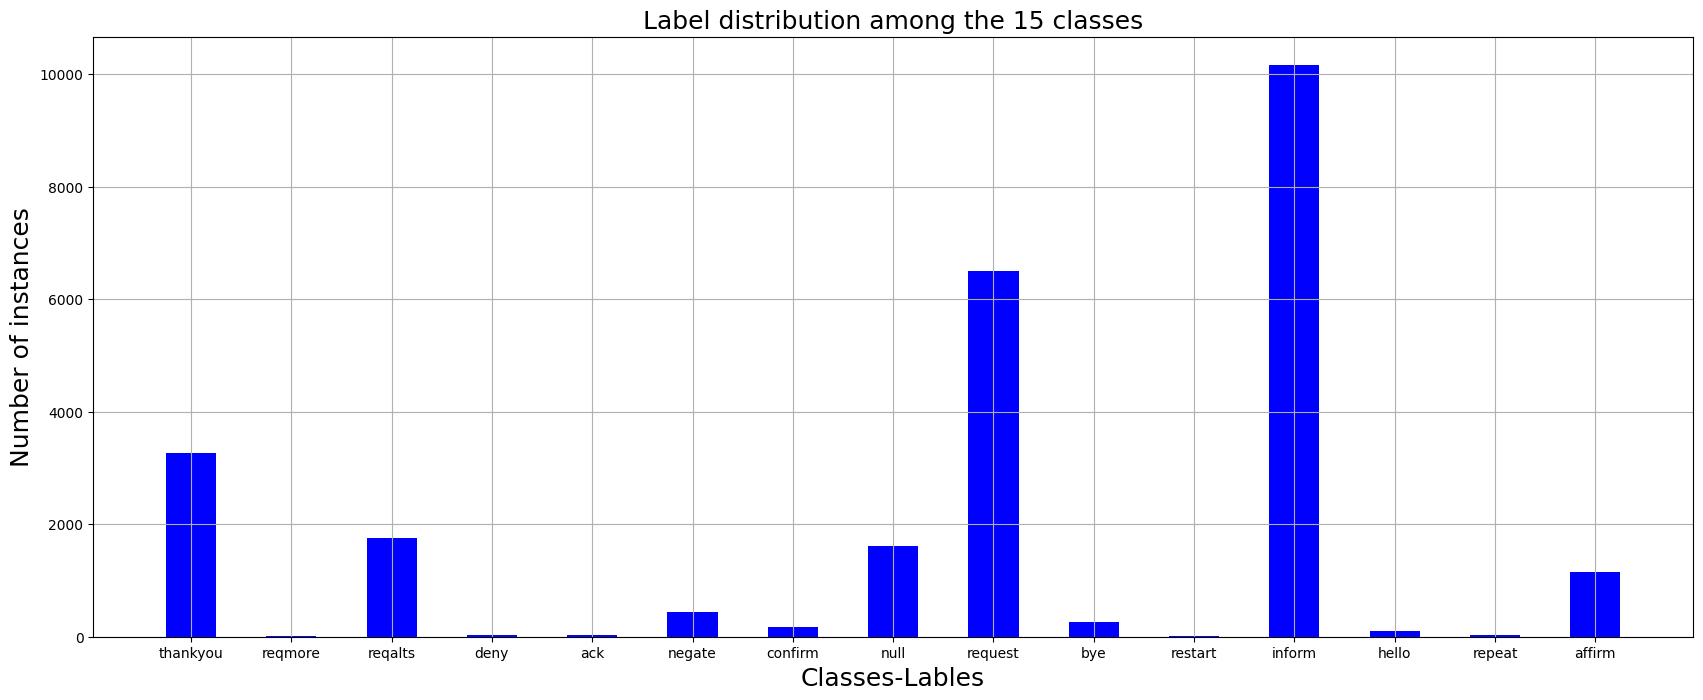

The maximum utterance length in the dataset is:  23
The minimum utterance length in the dataset is:  1
The average utterance length in the dataset is:  3.729


In [4]:
all_scores = []
all_scores.append(n_zero)
all_scores.append(n_keyword)
algo1.Statistics(data_as_frame)

In [5]:
ml_model = Machine_learning_model(data_as_array,File1)
ml_model.pre_processing()
print()
mlnames = ['DT', 'LR', 'SVM', 'MLP']
ml_algos = [ml_model.decision_tree(),ml_model.logistic_regression(),ml_model.support_vector_machine(),ml_model.multi_layer_perceptron()]
for name_clf,clf in zip(mlnames,ml_algos):
    score_ml = ml_model.ml_model_train_test(clf,name_clf)
    all_scores.append(score_ml)
    print()

X_encoded shape:  (25500, 767)
y_encoded shape:  (25500,)
X_train shape: (21675, 767) | X_test shape: (3825, 767) | y_train shape: (21675,) | y_test shape: (3825,)

The DT model on train set had 97.527 accuracy with a standard deviation of 0.13
Accuracy on Test set for the DT model is: 97.882
The label on which the most errors are observed is:  null

The LR model on train set had 97.730 accuracy with a standard deviation of 0.20
Accuracy on Test set for the LR model is: 98.196
The label on which the most errors are observed is:  confirm

The SVM model on train set had 98.233 accuracy with a standard deviation of 0.18
Accuracy on Test set for the SVM model is: 98.275
The label on which the most errors are observed is:  null

The MLP model on train set had 98.164 accuracy with a standard deviation of 0.24
Accuracy on Test set for the MLP model is: 98.536
The label on which the most errors are observed is:  null



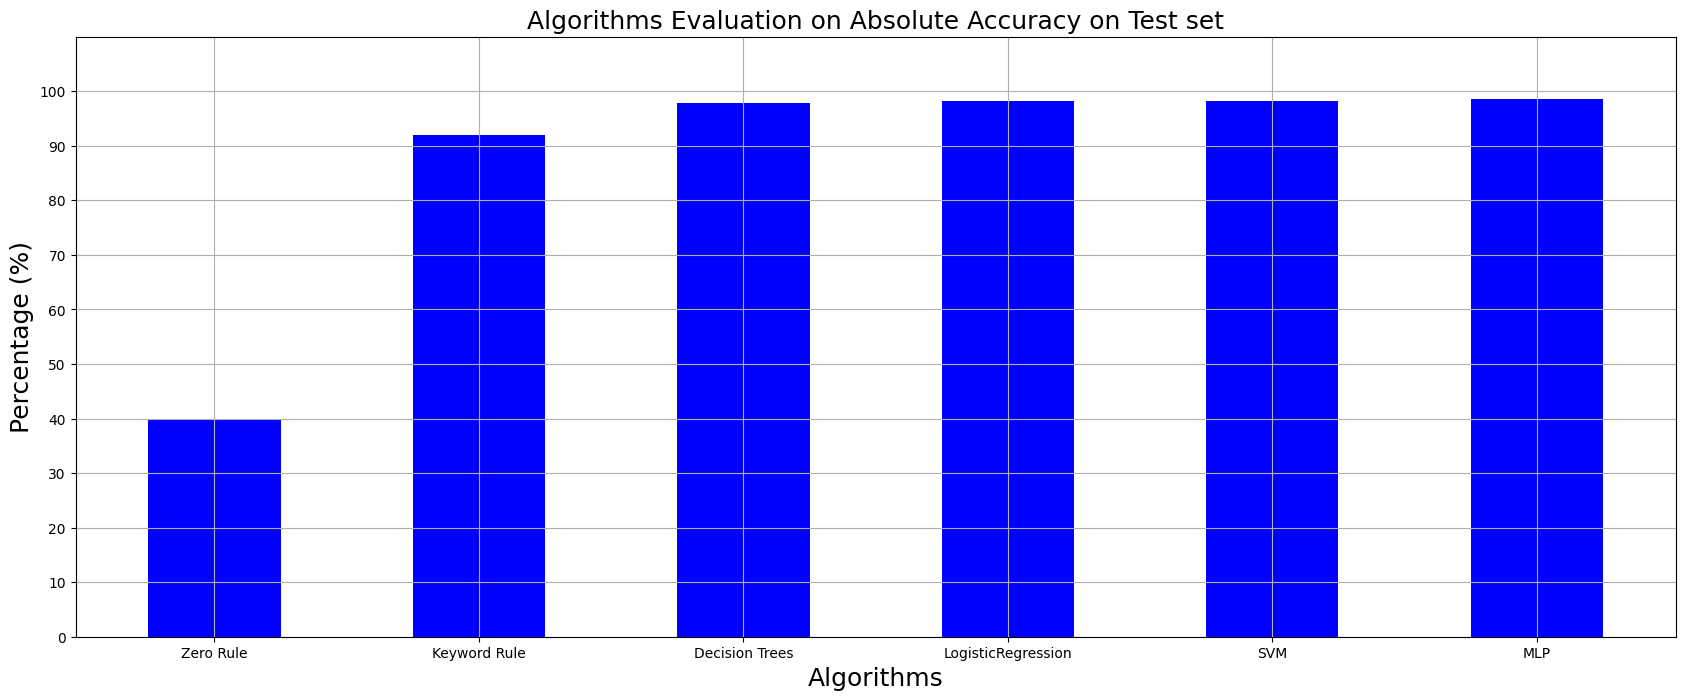

In [6]:
plot_results(all_scores)

In [7]:
utterances_new = ['God is love', 'I would like some cheap restaurnat', 'yes, I would like some food', 'nothing in the fridge']
clf_model = random.choice(ml_algos)
ml_model.manual_input(clf_model,utterances_new,inv_dict)

'God is love' => confirm
'I would like some cheap restaurnat' => null
'yes, I would like some food' => inform
'nothing in the fridge' => confirm


In [8]:
index = ml_algos.index(clf_model)
resp_name = mlnames[index] 
ml_model.pipeline_system(clf_model,resp_name)

The accuracy of the MLP pipeline system in test set is: 98.667


### Actual Talking

In [3]:
chat_obj = Chatbot('none', 'none', 'none', 0, labels_keys, "C:/Users/yugio/Projects/MAIR/Chatbot/")
chat_obj.Main()

Current State:  0
SYSTEM: Hello, welcome to the Cambridge restaurant system. You can ask for restaurants by area, price range or food type. How may I help you?
Classified as:  inform
Current State:  2
SYSTEM: What area?
Classified as:  inform
Current State:  3
SYSTEM: What price?
Classified as:  inform
Current State:  4
SYSTEM: What type of food?
Classified as:  inform
Current State:  5
Area: centre |  price: expensive |  Type of food: any
SYSTEM: Do you have additional requirements?
Classified as:  negate
SYSTEM SUGGESTION:  Curry garden is a Expensive priced restaurant in the Centre that serves Asian oriental food. 
The remaining restaurants with these preferences are: 22
SYSTEM: Is that okay for you?
Classified as:  restart
Current State:  0
SYSTEM: Hello, welcome to the Cambridge restaurant system. You can ask for restaurants by area, price range or food type. How may I help you?
Classified as:  inform
Current State:  2
SYSTEM: What area?
Classified as:  inform
Current State:  4
SY

SystemExit: 

c:\Users\yugio\Projects\myenv\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
short_chat = Shorten_Chatbot('none','none','none', labels_keys, "C:/Users/yugio/Projects/MAIR/Chatbot/")
short_chat.main()

SYSTEM: Hello, welcome to the Cambridge restaurant system? You can ask for restaurants by area, price range or food type. How may I help you?
Classified as:  inform
none none none
SYSTEM: Okay, I assume that you dont have any preferences, so...
The remaining restaurants with these preferences are:  109
SYSTEM SUGGESTION:  Peking restaurant is a Expensive priced restaurant in the South that serves Chinese food.
SYSTEM: Is that okay? Yes/No
Classified as:  negate
The remaining restaurants with these preferences are:  108
SYSTEM SUGGESTION:  Royal standard is a Expensive priced restaurant in the East that serves Spanish food.
SYSTEM: Is that okay? Yes/No
Classified as:  affirm
SYSTEM: You can ask for the phone number, address or post code of the restaurant
Classified as:  inform
SYSTEM: Okay! The phone is:  01223 247877 , the address is:  290 mill road city centre and the postcode is:  c.b 1

Total Runtime: 59.90 s
The total number of TURNS needed, were:  4

-------> ckjlz.mp3
The above f